
In this notebook you will code a minimal client that uses Python's `requests` library to interact with your running server.

In [1]:
import os
import io
import cv2
import requests
import numpy as np
from IPython.display import Image, display

More concretely:

1. The server is hosted in the URL [http://localhost:8000/](http://localhost:8000/).
2. The endpoint that serves your model is the `/predict` endpoint.

Also you can specify the model to use:  `yolov3` or`yolov3-tiny`. Let's stick to the tiny version for computational efficiency.

In [2]:
# follows REST API structure
base_url = 'http://localhost:8000' # where server is hosted
endpoint = '/predict' # model endpoint
model = 'yolov3-tiny' # model currently available for testing

To consume your model, you append the endpoint to the base URL to get the full URL. Notice that the parameters are absent for now.

In [3]:
url_with_endpoint_no_params = base_url + endpoint
url_with_endpoint_no_params

'http://localhost:8000/predict'

To set any of the expected parameters, the syntax is to add a "?" character followed by the name of the parameter and its value.

In [12]:
full_url = url_with_endpoint_no_params + "?model=" + model + "&confidence=0.6"
full_url

'http://localhost:8000/predict?model=yolov3-tiny&confidence=0.6'

This endpoint expects both a model's name and an image. But since the image is more complex it is not passed within the URL. So use the `requests` library to handle this process.

# Sending a request to the server

### Coding the response_from_server function

this endpoint expects a POST HTTP request. The `post` function is part of the requests library. 

To pass the file along with the request, you need to create a dictionary indicating the name of the file ('file' in this case) and the actual file.

 `status code` to check the status of the response the request triggered.

In [13]:
def response_from_server(url, image_file, verbose=True):
    """Makes a POST request to the server and returns the response.

    Args:
        url (str): URL that the request is sent to.
        image_file (_io.BufferedReader): File to upload, should be an image.
        verbose (bool): True if the status of the response should be printed. False otherwise.

    Returns:
        requests.models.Response: Response from the server.
    """
    
    files = {'file': image_file}
    response = requests.post(url, files=files)
    status_code = response.status_code
    if verbose:
        msg = "Everything went well!" if status_code == 200 else "There was an error when handling the request."
        print(msg)
    return response

Test function

In [14]:
with open("images/clock2.jpg", "rb") as image_file:
    prediction = response_from_server(full_url, image_file)

Everything went well!



To get the image with the bounding boxes and labels, parse the content of the response into an appropriate format.

In [7]:
dir_name = "images_predicted"
if not os.path.exists(dir_name):
    os.mkdir(dir_name)


### Creating the display_image_from_response function

In [8]:
def display_image_from_response(response):
    """Display image within server's response.

    Args:
        response (requests.models.Response): The response from the server after object detection.
    """
    
    # read content as byteStream
    image_stream = io.BytesIO(response.content)
    image_stream.seek(0)
    file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    filename = "image_with_objects.jpeg"
    cv2.imwrite(f'images_predicted/{filename}', image)
    display(Image(f'images_predicted/{filename}'))

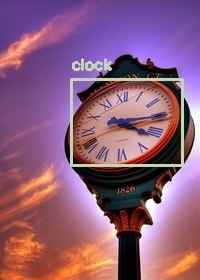

In [9]:
display_image_from_response(prediction)

Use object detection model through client

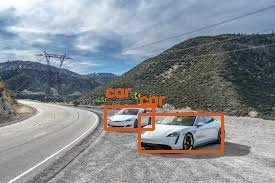

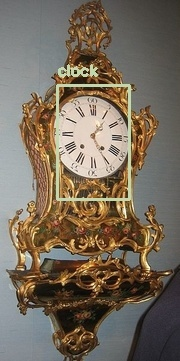

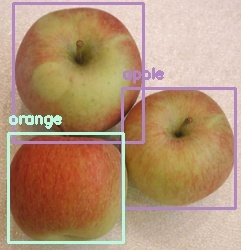

In [10]:
image_files = [
    'car2.jpg',
    'clock3.jpg',
    'apples.jpg'
]

for image_file in image_files:
    with open(f"images/{image_file}", "rb") as image_file:
        prediction = response_from_server(full_url, image_file, verbose=False)
    
    display_image_from_response(prediction)